In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
-((4/7)*np.log2((4/7))+(3/7)*np.log2((3/7)))

0.9852281360342515

In [12]:
age=np.array([28,25,30,35,38,32,40])
age_std=(age-np.mean(age))/np.std(age)
age_std

array([-0.91242552, -1.51120476, -0.51323935,  0.48472606,  1.0835053 ,
       -0.11405319,  1.48269147])

In [13]:
sal=[15000,17000,28000,10000,40000,50000,55000]
sal_std=(sal-np.mean(sal))/np.std(sal)
sal_std

array([-0.94898137, -0.82820192, -0.16391496, -1.25092999,  0.56076172,
        1.16465896,  1.46660758])

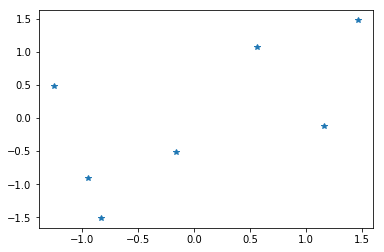

In [15]:
plt.plot(sal_std,age_std,'*')

In [20]:
wt=np.array([77,47,55,59,72,60,40,60,45,58])
(np.sum((wt-np.mean(wt))**2))/10

118.41000000000001

In [21]:
wt_d1_left=np.array([47,55,59,40,60,45,58])
(np.sum((wt_d1_left-np.mean(wt_d1_left))**2))/7

53.714285714285715

In [22]:
wt_d1_right=np.array([77,72,60])
(np.sum((wt_d1_right-np.mean(wt_d1_right))**2))/3

50.88888888888889

In [23]:
53.71+50.89

104.6

In [27]:
wt_d2_left=np.array([47,45])
(np.sum((wt_d2_left-np.mean(wt_d2_left))**2))/2

1.0

In [0]:
-((3/4)*np.log2((3/4))+(1/4)*np.log2((1/4)))

0.8112781244591328

In [0]:
0.8112781244591328*(4/7)

0.46358749969093305

In [0]:
-((1/3)*np.log2((1/3))+(2/3)*np.log2((2/3)))

0.9182958340544896

In [0]:
0.9182958340544896*(3/7)

0.39355535745192405

In [0]:
0.46358749969093305+0.39355535745192405

0.8571428571428571

In [0]:
0.9852281360342515-0.8571428571428571

0.12808527889139443

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("/content/drive/My Drive/Ensemble Techniques Mahesh Anand/prima-indians-diabetes.data",names=colnames)
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
prima_df['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [0]:
prima_df['outcome'] = prima_df['outcome'].replace({0: 'Healthy', 1: 'Diabetic'})

In [0]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [0]:
Xtrain=np.array(xtrain)
Ytrain=np.array(ytrain)

In [0]:
Xtest=np.array(xtest)
Ytest=np.array(ytest)

In [0]:
model1=DecisionTreeClassifier(random_state=0)
model1.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [33]:
ytest.value_counts()

0    157
1     74
Name: outcome, dtype: int64

In [34]:
tpr=np.array([59.45,62.35,46.05,58.16,54.43])
np.var(tpr,ddof=1)

39.57982000000002

In [35]:
(43.86-41.76)/43.86

0.04787961696306433

In [36]:
(39.57-20.05)/39.57

0.4933030073287844

In [0]:
model2=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
model2.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [0]:
ypred1=model1.predict(Xtest)
ypred2=model2.predict(Xtest)

In [0]:
acc1=metrics.accuracy_score(Ytest,ypred1)
print(acc1)

0.7229437229437229


In [0]:
acc2=metrics.accuracy_score(Ytest,ypred2)
print(acc2)

0.7316017316017316


In [0]:
cm=metrics.confusion_matrix(Ytest,ypred)
print(cm)

[[ 44  30]
 [ 34 123]]


In [0]:
cr=metrics.classification_report(Ytest,ypred)
print(cr)

              precision    recall  f1-score   support

    Diabetic       0.56      0.59      0.58        74
     Healthy       0.80      0.78      0.79       157

   micro avg       0.72      0.72      0.72       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.73      0.72      0.72       231



In [0]:

print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = xtrain.columns))


           Imp
preg  0.045053
glu   0.309664
bp    0.124180
sft   0.062356
ins   0.032426
bmi   0.153164
dpf   0.110887
age   0.162269


In [0]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'criterion' : ['entropy','gini']}
GS=GridSearchCV(model,parameter,cv=3)
GS.fit(X,Y)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
GS.score(Xtest,Ytest)

0.8095238095238095

In [0]:
gs_pred=GS.predict(Xtest)

In [0]:
metrics.accuracy_score(Ytest,gs_pred)

0.8095238095238095

In [0]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [0]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=0)
model2.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [0]:
ypred2=model2.predict(Xtest)

In [0]:
acc2=metrics.accuracy_score(Ytest,ypred2)
print(acc2)

0.7316017316017316


In [0]:
cm2=metrics.confusion_matrix(Ytest,ypred2)
print(cm2)

[[ 42  32]
 [ 30 127]]


In [0]:
cr2=metrics.classification_report(Ytest,ypred2)
print(cr2)

              precision    recall  f1-score   support

    Diabetic       0.58      0.57      0.58        74
     Healthy       0.80      0.81      0.80       157

   micro avg       0.73      0.73      0.73       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231



In [0]:
from IPython.display import Image  
from sklearn import tree
from os import system

Diabetic_Tree_File = open('diabetes_tree.dot','w')
dot_data = tree.export_graphviz(model1, out_file=Diabetic_Tree_File, 
        feature_names = list(xtrain), class_names = list(ytrain))

Diabetic_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


TypeError: ignored

In [0]:
system("dot -Tpng diabetes_tree.dot -o diabetic_tree.png")   # This command is to the OS
Image("diabetic_tree.png")        # use the image command to read the .png file and print on screen